## Insights Into Data with Streamlit Dashboard

We aim to improve speed of data-oriented web app by creating views using this Jupyter Notebook. Also, this notebook is going to provide us to opportunity of discovering insight into data by diving analysis into chunks.

Needed visualizations for the dashboard can be listed under several topics such as:

*   Dataset-related insight:
    *   Transactions' Date History
    *   Company Type Distribution
    *   Check Used/Denied Distribution
    *   BK's Limit-Risk Distribution
    *   TK's Limit-Risk Distribution
    *   Company Defined *MUSTERI_RISK_SEVIYESI* distribution
*   Segmentation-related insight:
    *   Comparing Distribution of ML with *MUSTERI_RISK_SEVIYESI*
    *   Limit-Risk Ratio over Segments
    *   Account Latency over Segments
    *   Transaction Frequency over Segments

### Add Libraries and Read Data

In [1]:
import pandas as pd
import numpy as np

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
bk_data=pd.read_feather('data/bk_customer_segmentation.feather')

In [3]:
tk_data=pd.read_feather('data/tk_customer_segmentation.feather')

### Analysis on Features

##### Customer Risk Level (Pre-Defined By the Company)

In [68]:
bk_risk_level = bk_data[['MUSTERI_ID','MUSTERI_RISK_SEVIYESI']]   # get necessary columns from G type customers
tk_risk_level = tk_data[['MUSTERI_ID','MUSTERI_RISK_SEVIYESI']]   # get necessary columns from T type customers

In [70]:
risk_level = pd.concat([bk_risk_level,tk_risk_level],axis=0)     # union of two dataframes
risk_level.reset_index(drop=True,inplace=True)
risk_level.drop_duplicates(subset='MUSTERI_ID',keep='first',inplace=True)

In [71]:
risk_level = risk_level['MUSTERI_RISK_SEVIYESI'].value_counts().sort_index().reset_index()

Add 4 and 5 as index because they exist in the documents although not available on data

In [73]:
new_row_4 = {'index':4, 'MUSTERI_RISK_SEVIYESI':0}
new_row_5 = {'index':5, 'MUSTERI_RISK_SEVIYESI':0}
risk_level= risk_level.append(new_row_4, ignore_index=True)
risk_level= risk_level.append(new_row_5, ignore_index=True)

In [74]:
risk_level

,index,MUSTERI_RISK_SEVIYESI
0,0,64170
1,1,1448
2,2,378
3,3,1226
4,4,0
5,5,0


In [75]:
risk_level.to_feather('streamlit_view/risk_level.feather')

##### Counting Customer-Related Info for Metrics

In [ ]:
tk_data_metrics = tk_data[['ID','MUSTERI_ID','KESIDECI_ID','SUBE','CEK_NO']]
bk_data_metrics = bk_data[['ID','MUSTERI_ID','KESIDECI_ID','SUBE','CEK_NO']]

metrics = pd.concat([tk_data_metrics,bk_data_metrics],axis=0)
metrics.reset_index(drop=True,inplace=True)

In [24]:
# count unique count of ID
metrics['CEK_NO'].nunique()

389780

In [28]:
#metrics.to_feather('streamlit_view/metrics.feather')

##### Check Income and Loss of Customers

In [73]:
bk_cek_income_loss = bk_data[['ID','MUSTERI_ID','CEK_INCOME','CEK_LOSS','CEK_GELIR_PERCENTAGE']]
tk_cek_income_loss = tk_data[['ID','MUSTERI_ID','CEK_INCOME','CEK_LOSS','CEK_GELIR_PERCENTAGE']]

cek_income_loss = pd.concat([bk_cek_income_loss,tk_cek_income_loss],axis=0)
cek_income_loss = cek_income_loss.reset_index(drop=True)

In [76]:
#cek_income_loss.to_feather('streamlit_view/cek_income_loss.feather')

##### Transaction Frequency over Customers

In [4]:
bk_customer_freq = bk_data[['MUSTERI_ID','TRANSACTIONS_FREQ','KULLANDIRIM','SIRKET_TURU']]
tk_customer_freq = tk_data[['MUSTERI_ID','TRANSACTIONS_FREQ','KULLANDIRIM','SIRKET_TURU']]
# and union of two data frames
customer_freq=pd.concat([bk_customer_freq,tk_customer_freq],axis=0)

In [5]:
# drop duplicate records for MUSTERI_ID
customer_freq.drop_duplicates(subset='MUSTERI_ID',keep='first',inplace=True)

In [6]:
customer_freq.reset_index(drop=True,inplace=True)
#customer_freq.to_feather('streamlit_view/customer_frequency.feather')

[Text(0.5, 0, 'Number of Transactions'), Text(0, 0.5, 'Number of Customers')]

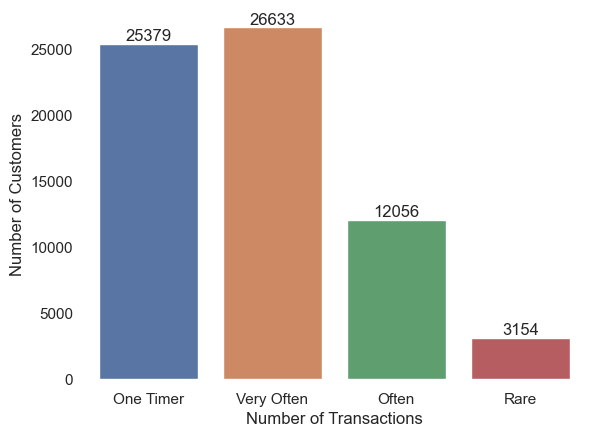

In [68]:
sns.set(style="white")              # set background to white
ax=sns.barplot(x="TRANSACTIONS_FREQ", y="count",
        data=customer_freq.groupby('TRANSACTIONS_FREQ').count().reset_index().rename(columns={'MUSTERI_ID':'count'}))

ax.bar_label(ax.containers[0])      # add values on top of bars
sns.set_context("paper", font_scale=1.5)
sns.despine(left=True, bottom=True)                                         # delete x and y axis lines
ax.set(xlabel='Number of Transactions', ylabel='Number of Customers')       # rename x and y axis

##### Distribution of Days Since Last Transaction

In [55]:
tk_dataset=pd.read_feather('data/tk_data.feather')

In [59]:
tk_yakinlik = tk_dataset[['MUSTERI_ID','DAYS_SINCE_LAST_TRANSACTION']]
bk_yakinlik = bk_data[['MUSTERI_ID','DAYS_SINCE_LAST_TRANSACTION']]


In [57]:
# keep MUSTERI_ID unique by dropping duplicates
bk_yakinlik.drop_duplicates(subset='MUSTERI_ID',keep='first',inplace=True)
tk_yakinlik.drop_duplicates(subset='MUSTERI_ID',keep='first',inplace=True)

C:\Users\emirh\AppData\Local\Temp\ipykernel_21236\2171703032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bk_yakinlik.drop_duplicates(subset='MUSTERI_ID',keep='last',inplace=True)
C:\Users\emirh\AppData\Local\Temp\ipykernel_21236\2171703032.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tk_yakinlik.drop_duplicates(subset='MUSTERI_ID',keep='last',inplace=True)


In [58]:
last_transact=pd.concat([bk_yakinlik,tk_yakinlik],axis=0)     # union of two dataframes
last_transact.reset_index(drop=True,inplace=True)

In [61]:
last_transact.drop_duplicates(subset='MUSTERI_ID',keep='first',inplace=True)
last_transact.reset_index(drop=True,inplace=True)

In [29]:
#last_transact.to_feather('streamlit_view/last_transaction')

In [62]:
last_transact.value_counts('DAYS_SINCE_LAST_TRANSACTION').sort_index(ascending=True)

DAYS_SINCE_LAST_TRANSACTION
1      1851
2      1269
3      1089
4      1076
5      1094
       ... 
327     150
330     114
331     107
332     117
333     160
Length: 230, dtype: int64

##### Transaction Records over Date

The dataset contains check records from 2018 year. Its interval can be defined as from the first day of 2018 to end of November 2018. We are going to present a transaction history with a date filter

In [109]:
bk_transact_date=bk_data[['ID','ISLEM_TARIHI','SIRKET_TURU']]   # get necessary columns from G type customers
tk_transact_date=tk_data[['ID','ISLEM_TARIHI','SIRKET_TURU']]   # get necessary columns from T type customers

transact_date=pd.concat([bk_transact_date,tk_transact_date],axis=0)     # union of two dataframes
transact_date.reset_index(drop=True,inplace=True)                       # reset index to save to feather

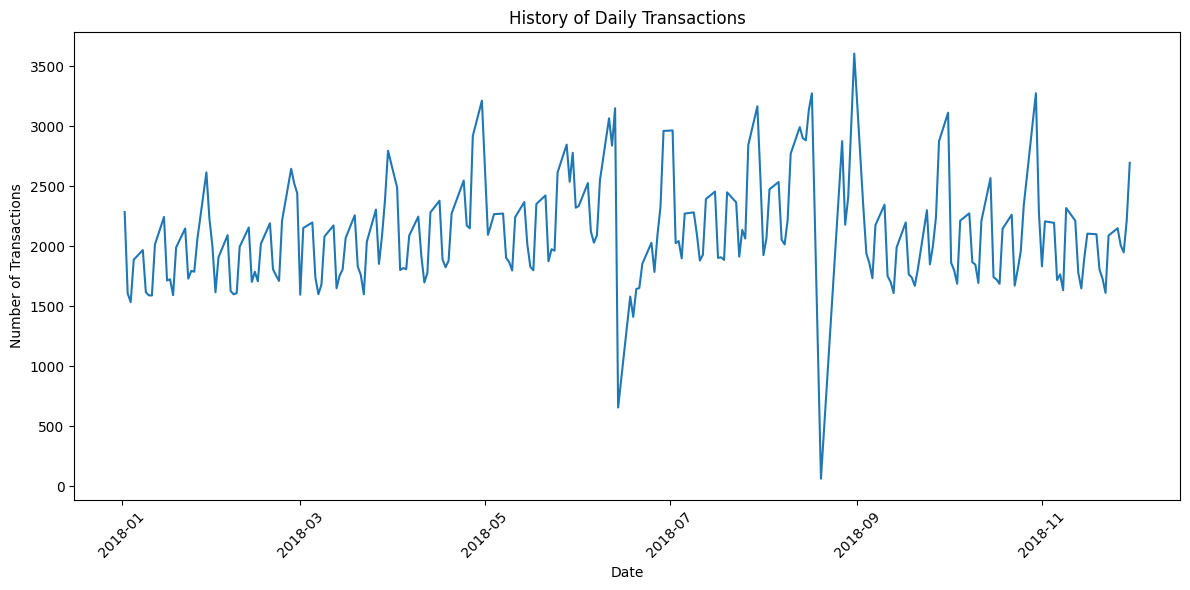

In [85]:
plt.figure(figsize=(12, 6))
plt.plot(transact_date.groupby('ISLEM_TARIHI')['ID'].count().reset_index()['ISLEM_TARIHI'],
    transact_date.groupby('ISLEM_TARIHI')['ID'].count().reset_index()['ID'])
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('History of Daily Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [84]:
# save the view into a feather file
#transact_date.to_feather('streamlit_view/transaction_history.feather')

##### Distribution of Company Type over Dataframe

Using **SIRKET_TURU** to see distribution

In [11]:
bk_company_type = bk_data[['MUSTERI_ID','SIRKET_TURU']]   # get necessary columns from G type customers
tk_company_type = tk_data[['MUSTERI_ID','SIRKET_TURU']]   # get necessary columns from T type customers

In [12]:
# keep MUSTERI_ID unique by dropping duplicates
bk_company_type.drop_duplicates(subset='MUSTERI_ID',keep='first',inplace=True)
tk_company_type.drop_duplicates(subset='MUSTERI_ID',keep='first',inplace=True)

C:\Users\emirh\AppData\Local\Temp\ipykernel_6848\1717453501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bk_company_type.drop_duplicates(subset='MUSTERI_ID',keep='first',inplace=True)
C:\Users\emirh\AppData\Local\Temp\ipykernel_6848\1717453501.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tk_company_type.drop_duplicates(subset='MUSTERI_ID',keep='first',inplace=True)


In [13]:
company_type=pd.concat([bk_company_type,tk_company_type],axis=0)     # union of two dataframes
company_type.reset_index(drop=True,inplace=True)

In [15]:
company_type['SIRKET_TURU'].value_counts()

G             38374
T             28881
Name: SIRKET_TURU, dtype: Int64

In [93]:
# save the view into a feather file
#company_type.to_feather('streamlit_view/company_type_distribution.feather')

##### Use of Checks over Dataset

Using **KULLANDIRIM** to see distribution

In [98]:
bk_company_type_k = bk_data[['MUSTERI_ID','KULLANDIRIM']]   # get necessary columns from G type customers
tk_company_type_k = tk_data[['MUSTERI_ID','KULLANDIRIM']]   # get necessary columns from T type customers

In [99]:
# keep MUSTERI_ID unique by dropping duplicates
bk_company_type_k.drop_duplicates(subset='MUSTERI_ID',keep='first',inplace=True)
tk_company_type_k.drop_duplicates(subset='MUSTERI_ID',keep='first',inplace=True)

C:\Users\emirh\AppData\Local\Temp\ipykernel_9820\1924120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bk_company_type_k.drop_duplicates(subset='MUSTERI_ID',keep='first',inplace=True)
C:\Users\emirh\AppData\Local\Temp\ipykernel_9820\1924120.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tk_company_type_k.drop_duplicates(subset='MUSTERI_ID',keep='first',inplace=True)


In [100]:
company_type_k=pd.concat([bk_company_type,tk_company_type],axis=0)     # union of two dataframes
company_type_k.reset_index(drop=True,inplace=True)

In [102]:
# save the view into a feather file
#company_type_k.to_feather('streamlit_view/companies_KV_KY_distribution.feather')

##### Check Amount by KV/KY

In [5]:

bk_cek_tutar = bk_data[['ID','MUSTERI_ID','CEK_TUTAR','KULLANDIRIM']]   # get necessary columns from G type customers
tk_cek_tutar = tk_data[['ID','MUSTERI_ID','CEK_TUTAR','KULLANDIRIM']]   # get necessary columns from G type customers

# concat two dataframes
cek_tutar=pd.concat([bk_cek_tutar,tk_cek_tutar],axis=0)     # union of two dataframes

In [24]:
cek_tutar.reset_index(drop=True,inplace=True)
#cek_tutar.to_feather('streamlit_view/cek_tutar_by_kullandırım.feather')

In [19]:
def cek_tutar_histogram(KULLANDIRIM):
    sns.displot(cek_tutar[cek_tutar['KULLANDIRIM']==KULLANDIRIM].groupby('CEK_TUTAR')['ID'].count().reset_index(),
        x=cek_tutar[cek_tutar['KULLANDIRIM']==KULLANDIRIM].groupby('CEK_TUTAR')['ID'].count().reset_index()['CEK_TUTAR'], kind="kde")

cek_tutar_histogram('KV')
cek_tutar_histogram('KY')

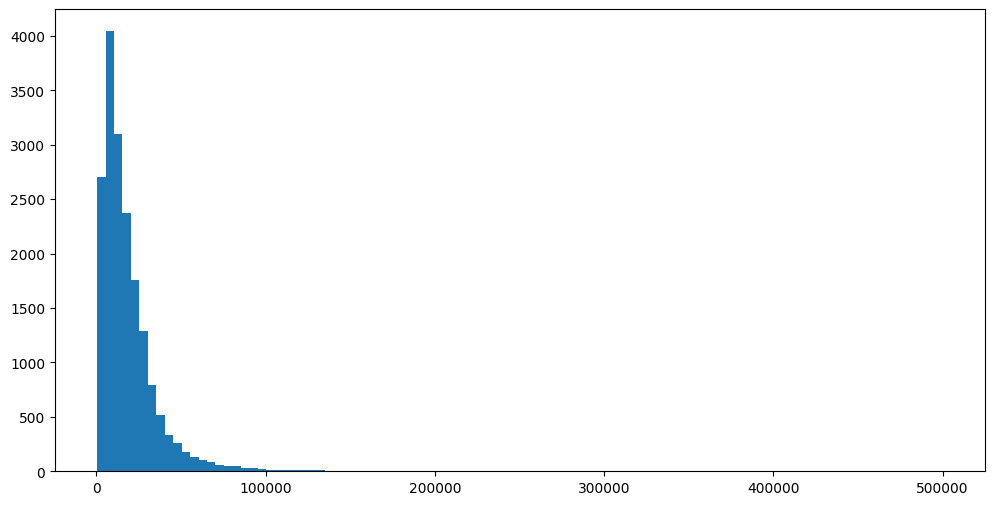

In [17]:
# visualize histogram of cek_tutar_kv
plt.figure(figsize=(12, 6))
plt.hist(cek_tutar[cek_tutar['KULLANDIRIM']=='KV'].groupby('CEK_TUTAR')['ID'].count().reset_index()['CEK_TUTAR'],bins=100)
plt.show()

##### Limit/Risk Distribution for BK and TK

We are going to analyze this separately for both G type and T type customers. Visualizing it with scatter plot is going to perform trending line of these correlation

> For T type Customers

In [106]:
tk_limit_risk = tk_data[['MUSTERI_ID','TK_NAKDILIMIT','TK_NAKDIRISK',
                'TK_GAYRINAKDILIMIT','TK_GAYRINAKDIRISK']]     # get necessary columns from T type customers

In [108]:
#tk_limit_risk.to_feather('streamlit_view/tk_limit_risk_scatter.feather')

> For G type

In [34]:
bk_limit_risk = bk_data[['MUSTERI_ID','BK_LIMIT','BK_RISK']]     # get necessary columns from G type customers

In [111]:
#bk_limit_risk.to_feather('streamlit_view/bk_limit_risk_scatter.feather')

### Cluster-Related Descriptive Analysis

#### G Type Cluster

##### Preprocess for BK


Dive Into Data and Reshape it before creating views

Choose necessary data for analysis

In [5]:
bk_cluster = bk_data[['MUSTERI_ID','CLUSTER_LABELS_3','MUSTERI_RISK_SEVIYESI','BK_ORAN', 'BK_GECIKMEHESAP', 'BK_GECIKMEBAKIYE',
                'KESIDECI_COUNT','SUBE_COUNT','CEK_GELIR_PERCENTAGE', 'CEK_LOSS', 'DAYS_SINCE_LAST_TRANSACTION',
                'One Timer','Very Often','Often','Rare']]     # get necessary columns from G type customers

Rename using report coming from *ENM Team*, where:

*    2 is **G-Diamond** and *most reliable* customer segment
*    0 is **G-Gold** and *moderately* reliable segment
*    1 is **G-Bronze** and *least reliable* customer segment

In [6]:
# rename values of CLUSTER_LABELS_3 column
bk_cluster['CLUSTER_LABELS_3'].replace({0:'G-Gold',1:'G-Bronze',2:'G-Diamond'},inplace=True)

C:\Users\emirh\AppData\Local\Temp\ipykernel_1656\1694390047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bk_cluster['CLUSTER_LABELS_3'].replace({0:'G-Gold',1:'G-Bronze',2:'G-Diamond'},inplace=True)


Aggregate to Analyze

In [7]:
# aggregate customer clusters by mean
bk_cluster = bk_cluster.groupby(['CLUSTER_LABELS_3']).mean().reset_index()

Rename column names

In [8]:
bk_cluster.rename(columns={'CLUSTER_LABELS_3':'Segment','BK_ORAN':'Limit-Risk Ratio', 'KESIDECI_COUNT':'Number of Drawers','SUBE_COUNT':'Number of Branches',
                        'BK_GECIKMEBAKIYE':'Account Latency Amount','BK_GECIKMEHESAP':'Number of Latency Accounts',
                        'CEK_GELIR_PERCENTAGE':'Check Income (%)','DAYS_SINCE_LAST_TRANSACTION':'Proximity to Last Transaction (by Days)',
                        'MUSTERI_RISK_SEVIYESI':'Customer Risk Level (pre-defined by Company)','CEK_LOSS':'Check Loss (from Denied Check Usages)'},inplace=True)

In [9]:
bk_cluster

,Segment,MUSTERI_ID,Customer Risk Level (pre-defined by Company),Limit-Risk Ratio,Number of Latency Accounts,Account Latency Amount,Number of Drawers,Number of Branches,Check Income (%),Check Loss (from Denied Check Usages),Proximity to Last Transaction (by Days),One Timer,Very Often,Often,Rare
0,G-Bronze,1.081039e+07,0.068726,1.341041,2.529633,6949.574151,18.688370,1.027824,0.362917,636103.715345,60.835142,0.084585,0.832638,0.070952,0.011825
1,G-Diamond,9.912941e+06,0.046540,6.613556,2.733103,4599.717221,14.561414,1.018009,0.399722,421660.799976,63.204561,0.075918,0.784374,0.123457,0.016251
2,G-Gold,1.045723e+07,0.035964,1289.983955,1.694005,1383.049824,10.676083,1.017202,0.434880,292463.961226,68.981743,0.089986,0.721044,0.165794,0.023176


In [27]:
#bk_cluster.to_feather('streamlit_view/bk_cluster.feather')

##### Distribution of BK Segments by Customers

In [27]:
bk_cluster_distribution = bk_data[['MUSTERI_ID','CLUSTER_LABELS_3']]

In [28]:
# delete duplicate MUSTERI_ID
bk_cluster_distribution = bk_cluster_distribution.drop_duplicates(subset='MUSTERI_ID',keep='first')

In [29]:
bk_cluster_distribution = bk_cluster_distribution['CLUSTER_LABELS_3'].value_counts()
bk_cluster_distribution = bk_cluster_distribution.reset_index()

In [30]:
bk_cluster_distribution = bk_cluster_distribution.rename(columns={'index':'Segment','CLUSTER_LABELS_3':'Count'})
bk_cluster_distribution['Segment'].replace({0:'G-Gold',1:'G-Bronze',2:'G-Diamond'},inplace=True)

In [31]:
bk_cluster_distribution

,Segment,Count
0,G-Gold,31094
1,G-Diamond,6485
2,G-Bronze,795


In [32]:
#bk_cluster_distribution.to_feather('streamlit_view/bk_cluster_distribution')

##### Frequency of Segments of BK

In [11]:
bk_cluster

,Segment,MUSTERI_ID,Customer Risk Level (pre-defined by Company),Limit-Risk Ratio,Number of Latency Accounts,Account Latency Amount,Number of Drawers,Number of Branches,Check Income (%),Check Loss (from Denied Check Usages),Proximity to Last Transaction (by Days),One Timer,Very Often,Often,Rare
0,G-Bronze,1.081039e+07,0.068726,1.341041,2.529633,6949.574151,18.688370,1.027824,0.362917,636103.715345,60.835142,0.084585,0.832638,0.070952,0.011825
1,G-Diamond,9.912941e+06,0.046540,6.613556,2.733103,4599.717221,14.561414,1.018009,0.399722,421660.799976,63.204561,0.075918,0.784374,0.123457,0.016251
2,G-Gold,1.045723e+07,0.035964,1289.983955,1.694005,1383.049824,10.676083,1.017202,0.434880,292463.961226,68.981743,0.089986,0.721044,0.165794,0.023176


In [12]:
bk_cluster_freq = bk_cluster[['Segment','One Timer','Very Often','Often','Rare','Proximity to Last Transaction (by Days)']]

In [14]:
#bk_cluster_freq.to_feather('streamlit_view/bk_cluster_frequency.feather')

##### Check Income for BK

In [10]:
bk_check_income = bk_cluster[['Segment','Check Income (%)']]     # get necessary columns from G type customers

In [33]:
bk_check_income['Check Loss (%)'] = 1 - bk_check_income['Check Income (%)']

C:\Users\emirh\AppData\Local\Temp\ipykernel_19748\2444872118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bk_check_income['Check Loss (%)'] = 1 - bk_check_income['Check Income (%)']


In [41]:
#bk_check_income.to_feather('streamlit_view/bk_cluster_check_income.feather')

In [ ]:
# create stacked bar chart using two columns with plotly lib
import plotly.express as px
fig = px.bar(bk_check_income, x="Segment",
        y=["Check Income (%)", "Check Loss (%)"], title="Check Income and Loss by Customer Segment")
fig.show()

##### Distribution of Segments on Scatter Plot 

In [54]:
bk_cluster_scatter_map = bk_data[['MUSTERI_ID','CLUSTER_LABELS_3','BK_LIMIT','BK_RISK']]
bk_cluster_scatter_map =  bk_cluster_scatter_map.drop_duplicates(subset='MUSTERI_ID',keep='first')

In [55]:
bk_cluster_scatter_map = bk_cluster_scatter_map.reset_index()

In [56]:
# rename values of CLUSTER_LABELS_3 column
bk_cluster_scatter_map['CLUSTER_LABELS_3'].replace({0:'G-Gold',1:'G-Bronze',2:'G-Diamond'},inplace=True)

In [57]:
bk_cluster_scatter_map.to_feather('streamlit_view/bk_cluster_scatter_map.feather')

#### T Type Cluster

In [87]:
tk_data.columns

Index(['MUSTERI_ID', 'ID', 'CEK_NO', 'CEK_TUTAR', 'SIRKET_TURU', 'KULLANDIRIM',
       'SUBE', 'KESIDECI_ID', 'ISLEM_TARIHI', 'TK_NAKDILIMIT', 'TK_NAKDIRISK',
       'TK_GAYRINAKDILIMIT', 'TK_GAYRINAKDIRISK', 'TK_GECIKMEHESAP',
       'TK_GECIKMEBAKIYE', 'TK_KURUMSAYISI', 'MUSTERI_RISK_SEVIYESI',
       'TOTAL_RISK', 'TOTAL_LIMIT', 'TK_ORAN', 'KESIDECI_COUNT', 'CEK_INCOME',
       'CEK_LOSS', 'CEK_GELIR_PERCENTAGE', 'AVERAGE_DAYS', 'TRANSACTIONS_FREQ',
       'One Timer', 'Very Often', 'Often', 'Rare', 'CLUSTER_LABELS_4',
       'CLUSTER_LABELS_3'],
      dtype='object')

In [88]:
tk_cluster = tk_data[['CLUSTER_LABELS_3','TK_ORAN','KESIDECI_COUNT','CEK_GELIR_PERCENTAGE',
    'CEK_INCOME','TK_GECIKMEHESAP','TK_GECIKMEBAKIYE',
    'One Timer', 'Very Often', 'Often', 'Rare']]

In [89]:
tk_cluster['CLUSTER_LABELS_3'].replace({0:'T-Diamond',1:'outlier customers',2:'T-Bronze'},inplace=True)

C:\Users\emirh\AppData\Local\Temp\ipykernel_1656\1744381811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tk_cluster['CLUSTER_LABELS_3'].replace({0:'T-Diamond',1:'outlier customers',2:'T-Bronze'},inplace=True)


In [90]:
tk_cluster = tk_cluster.groupby(['CLUSTER_LABELS_3']).mean().reset_index()

In [91]:
tk_cluster.rename(columns={'CLUSTER_LABELS_3':'Segment','TK_ORAN':'Limit-Risk Ratio', 'KESIDECI_COUNT':'Number of Drawers',
            'TK_GECIKMEBAKIYE':'Account Latency Amount','TK_GECIKMEHESAP':'Number of Latency Accounts',
            'CEK_GELIR_PERCENTAGE':'Check Income (%)'},inplace=True)

In [93]:
#tk_cluster.to_feather('streamlit_view/tk_cluster.feather')

In [104]:
c = pd.read_feather('streamlit_view/bk_tk_concat_cluster_result.feather')

In [109]:
c[['Segment','Limit-Risk Ratio']].sort_values(by='Limit-Risk Ratio',ascending=False)

,Segment,Limit-Risk Ratio
1,T-Diamond,77684.839042
5,G-Gold,1289.983955
0,T-Bronze,63.455576
4,G-Diamond,6.613556
2,outlier customers,1.441890
3,G-Bronze,1.341041


##### Distribution of TK Segment Customers

In [34]:
tk_cluster_distribution = tk_data[['MUSTERI_ID','CLUSTER_LABELS_3']]

In [35]:
# delete duplicate MUSTERI_ID
tk_cluster_distribution = tk_cluster_distribution.drop_duplicates(subset='MUSTERI_ID',keep='first')

In [36]:
tk_cluster_distribution

,MUSTERI_ID,CLUSTER_LABELS_3
0,11820145,0
32,11672216,0
72,11827634,0
103,11882014,0
106,12042825,0
...,...,...
252329,11774058,0
252330,11635282,0
252332,11908637,0
252333,11908757,0


In [37]:
tk_cluster_distribution = tk_cluster_distribution['CLUSTER_LABELS_3'].value_counts()
tk_cluster_distribution = tk_cluster_distribution.reset_index()

In [40]:
tk_cluster_distribution

,Segment,Count
0,0,28723
1,2,155
2,1,3


In [41]:
tk_cluster_distribution = tk_cluster_distribution.rename(columns={'index':'Segment','CLUSTER_LABELS_3':'Count'})
tk_cluster_distribution['Segment'].replace({0:'T-Diamond',1:'outlier customers',2:'T-Bronze'},inplace=True)

In [42]:
tk_cluster_distribution

,Segment,Count
0,T-Diamond,28723
1,T-Bronze,155
2,outlier customers,3


In [43]:
tk_cluster_distribution.to_feather('streamlit_view/tk_cluster_distribution')

##### Distribution over Scatter Map

In [58]:
tk_data.columns

Index(['MUSTERI_ID', 'ID', 'CEK_NO', 'CEK_TUTAR', 'SIRKET_TURU', 'KULLANDIRIM',
       'SUBE', 'KESIDECI_ID', 'ISLEM_TARIHI', 'TK_NAKDILIMIT', 'TK_NAKDIRISK',
       'TK_GAYRINAKDILIMIT', 'TK_GAYRINAKDIRISK', 'TK_GECIKMEHESAP',
       'TK_GECIKMEBAKIYE', 'TK_KURUMSAYISI', 'MUSTERI_RISK_SEVIYESI',
       'TOTAL_RISK', 'TOTAL_LIMIT', 'TK_ORAN', 'KESIDECI_COUNT', 'CEK_INCOME',
       'CEK_LOSS', 'CEK_GELIR_PERCENTAGE', 'AVERAGE_DAYS', 'TRANSACTIONS_FREQ',
       'One Timer', 'Very Often', 'Often', 'Rare', 'CLUSTER_LABELS_4',
       'CLUSTER_LABELS_3'],
      dtype='object')

In [59]:
tk_cluster_map = tk_data[['MUSTERI_ID','CLUSTER_LABELS_3','TOTAL_LIMIT','TOTAL_RISK']]

In [60]:
tk_cluster_map = tk_cluster_map.drop_duplicates(subset='MUSTERI_ID',keep='first')
tk_cluster_map = tk_cluster_map.reset_index()
del tk_cluster_map['index']

In [66]:
# rename values of CLUSTER_LABELS_3 column
tk_cluster_map['CLUSTER_LABELS_3'].replace({0:'T-Diamond',2:'T-Bronze',1:'outlier customers'},inplace=True)

In [68]:
#tk_cluster_map.to_feather('streamlit_view/tk_cluster_map.feather')

##### Compare BK segments with TK as Concatenated

In [94]:
tk_cluster = pd.read_feather('streamlit_view/tk_cluster.feather')
bk_cluster = pd.read_feather('streamlit_view/bk_cluster.feather')

In [97]:
tk_cluster = tk_cluster[['Segment','Limit-Risk Ratio','Number of Drawers','Number of Latency Accounts',
    'One Timer', 'Very Often','Often', 'Rare']]
bk_cluster = bk_cluster[['Segment','Limit-Risk Ratio','Number of Drawers','Number of Latency Accounts',
    'One Timer', 'Very Often','Often', 'Rare']]

# concat these two
cluster = pd.concat([tk_cluster,bk_cluster],axis=0)

In [101]:
cluster = cluster.reset_index()

In [102]:
#cluster.to_feather('streamlit_view/bk_tk_concat_cluster_result.feather')